In [1]:
import math  
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.spatial import Voronoi, voronoi_plot_2d

KeyboardInterrupt: 

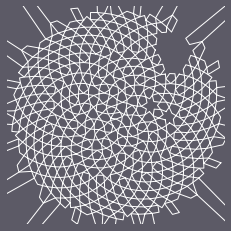

In [121]:
golden_angle = 137.5077640500378546463487396283702776206886952699253696312384958261062333851951
phi = golden_angle * ( math.pi / 180.0 ) 

for i in range(5,500,2):

    point_num = i

    ###
    ### CALCULATE PHYLLOTACTIC PATTERN
    ###

    xlist = []
    ylist = []

    for n in range (0,point_num): 
        r = math.sqrt(n) 
        theta = n * phi 

        x = r * math.cos(theta)
        y = r * math.sin(theta)

        xlist.append(x)
        ylist.append(y)

    ###
    ### CALCULATE VORONOI DIAGRAM
    ### 

    coords = np.array(list(zip(xlist,ylist)))
    vor = Voronoi(coords)

    ###
    ### ISOLATE VORONOI REGIONS
    ###

    x_regions = []
    y_regions = []

    for i in vor.regions:

        if -1 in i:
            continue

        if not i:
            continue

        xvals = []
        yvals = []

        for j in i:

            xvals.append(vor.vertices[j][0])
            yvals.append(vor.vertices[j][1])

        x_regions.append(xvals)
        y_regions.append(yvals)

    ###
    ### CALCULATE MIDPOINTS OF EACH VORONOI REGION SIDE FOR GIRIH
    ###

    fig = plt.figure(facecolor="#5c5a66")

    for i in range(len(x_regions)):

        curr_xvals = x_regions[i]
        curr_yvals = y_regions[i]

        midpoints_x = []
        midpoints_y = []

        for j in range(len(curr_xvals)-1):

            midpoints_x.append( (curr_xvals[j] + curr_xvals[j+1])/2 )
            midpoints_y.append( (curr_yvals[j] + curr_yvals[j+1])/2 )

        midpoints_x.append( (curr_xvals[0] + curr_xvals[-1])/2 )
        midpoints_y.append( (curr_yvals[0] + curr_yvals[-1])/2 )
        midpoints_x.append( midpoints_x[0] )
        midpoints_y.append( midpoints_y[0] )

        ###
        ### PLOT
        ###

        lim = max(np.abs(xlist))*1
        plt.plot(midpoints_x, midpoints_y, c="white", lw=1)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.xlim(-lim, lim)
        plt.ylim(-lim, lim)
        plt.axis("off")

        filename = "./temp/num" + str(point_num) + ".jpg"
        plt.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='none')
    plt.close(fig)
    
